<a href="https://colab.research.google.com/github/Alexiaran/traitement_images_contours/blob/main/traitement_image_YOLO%2BSIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


image 1/1 /content/image_google.jpg: 384x640 1 airplane, 996.0ms
Speed: 3.7ms preprocess, 996.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


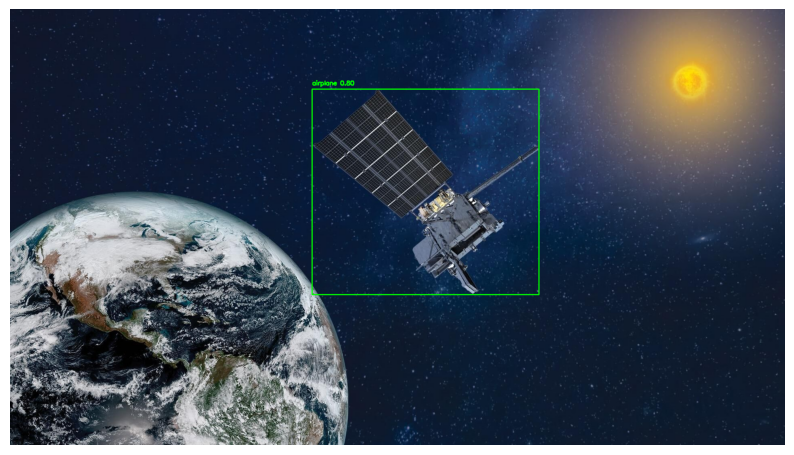

In [ ]:
# Installer Ultralytics (YOLOv5)
!pip install ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


# Charger le modèle YOLOv5 pré-entraîné
model = YOLO("yolov8m.pt")

# Charger et analyser l'image
image_path = "/content/image_google.jpg"
results = model.predict(source=image_path, conf=0.3)

# Charger l'image originale pour l'affichage
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Annoter l'image avec les résultats
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordonnées de la boîte
        confidence = float(box.conf[0])         # Confiance
        class_id = int(box.cls[0])              # ID de la classe
        label = result.names[class_id]          # Nom de la classe

        # Dessiner la boîte et le label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Afficher l'image annotée
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()


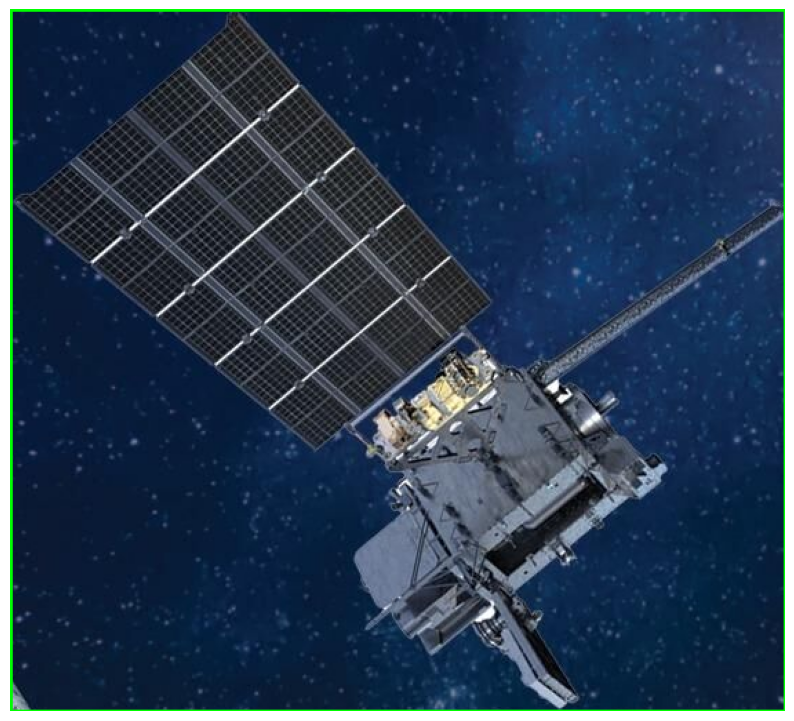

In [ ]:
#extraction des objets détéctés
for box in result.boxes:
  x1,y1,x2,y2= map(int,box.xyxy[0])
  crop =image[y1:y2,x1:x2]
  plt.figure(figsize=(10,10))
  plt.imshow(crop)
  plt.axis("off")
  plt.show()

In [ ]:
#charger le dossier sur les objets connus
import os
def load_objet_connu(folder_path="/content/sample_data/objet_connu"):
    objet_connu = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            objet_connu.append({
                'name':os.path.splitext(filename)[0],
                'image': cv2.imread(image_path)
            })
    return objet_connu
objet_connu = load_objet_connu()

In [ ]:
#comparer l'image avec les objets connus
def sift_similarity(image1, image2):
    sift = cv2.SIFT_create()  # Création de l'objet SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # Utilisation du BFMatcher avec NORM_L2 pour SIFT (au lieu de NORM_HAMMING pour ORB)
    matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = matcher.match(descriptors1, descriptors2)

    # Trie des matches par distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Retourne le nombre de correspondances et les correspondances elles-mêmes
    similarity = len(matches)
    return similarity, matches

def comparaison_objet(image_path,objet_connu):
    highest_similarity = 0
    best_match = None
    for objet in objet_connu: #objet connu est le dossier contenant les images dont le titre correspond à la nature de l'image
        similarity, matches =orb_similarity(crop,objet['image'])
        print(f"comparaison avec {objet['name']}: {similarity} correspondance trouvées.")

        if similarity > highest_similarity:
          highest_similarity = similarity
          best_match = objet['name']

    if best_match:
          print(f"L'image ressemble le plus à : {best_match}: avec une similarité de {highest_similarity}")
    else:
          print("Aucun objet reconnu, peut-être un autre objet ou debris")



In [ ]:
comparaison_objet(crop,objet_connu)

comparaison avec planete: 120 correspondance trouvées.
comparaison avec satellite: 119 correspondance trouvées.
L'image ressemble le plus à : planete: avec une similarité de 120
